Confusion Matrix:
[[283969    346]
 [   353    139]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9988    0.9988    284315
           1     0.2866    0.2825    0.2845       492

    accuracy                         0.9975    284807
   macro avg     0.6427    0.6407    0.6417    284807
weighted avg     0.9975    0.9975    0.9975    284807



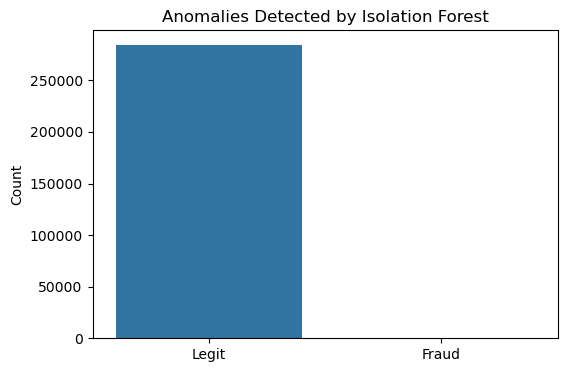

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df = pd.read_csv('creditcard.csv')
df.head()

# Droping time column 
df_model = df.drop(['Time'], axis=1)

# Store features and labels
X = df_model.drop('Class', axis=1)
y = df_model['Class']

# Creating a model
iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)

# Fiting the model
iso_forest.fit(X)

# Predicting anomalies (-1 = fraud, 1 = legit)
y_pred = iso_forest.predict(X)

y_pred = [1 if x == -1 else 0 for x in y_pred]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred, digits=4))

plt.figure(figsize=(6,4))
sns.countplot(x=y_pred)
plt.title("Anomalies Detected by Isolation Forest")
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.ylabel('Count')
plt.show()
